#### You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans is more profitable in order to adjust the advertising budget. You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze clients' behavior and determine which prepaid plan is more profitable.

#### Description of the plans

#### Surf
#### Monthly charge: 20 dollars
#### 500 monthly minutes, 50 texts, and 15 GB of data
#### After exceeding the package limits: 1. 1 minute: 3 cents (Megaline always rounds up the minute and megabyte values. If the call lasted just one second, it will be counted as one minute, and if one megabyte of data was used, it will be counted as one gigabyte) 2. 1 text message: 3 cents 3. 1 GB of data: 10 dollars

#### Ultimate
#### Monthly charge: 70 dollars
#### 3000 monthly minutes, 1000 text messages, and 30 GB of data
#### After exceeding the package limits: 1. 1 minute: 1 cent 2. 1 text message: 1 cent 3. 1 GB of data: 7 dollars


Description of the data

The users table (data on users):
user_id — unique user identifier
first_name — user's name
last_name — user's last name
age — user's age (years)
reg_date — subscription date (dd, mm, yy)
churn_date — the date the user stopped using the service (if the value is missing, the calling plan was being used when this data was generated)
city — user's city of residence
plan — calling plan name

The calls table (data on calls):
id — unique call identifier
call_date — call date
duration — call duration (in minutes)
user_id — the identifier of the user making the call

The messages table (data on texts):
id — unique text message identifier
message_date — text message date
user_id — the identifier of the user sending the text

The internet table (data on web sessions):
id — unique session identifier
mb_used — the volume of data spent during the session (in megabytes)
session_date — web session date
user_id — user identifier

The plans table (data on the plans):
plan_name — calling plan name
usd_monthly_fee — monthly charge in US dollars
minutes_included — monthly minute allowance
messages_included — monthly text allowance
mb_per_month_included — data volume allowance (in megabytes)
usd_per_minute — price per minute after exceeding the package limits (e.g., if the package includes 100 minutes, the 101st minute will be charged)
usd_per_message — price per text after exceeding the package limits
usd_per_gb — price per extra gigabyte of data after exceeding the package limits (1 GB = 1024 megabytes)


## Step 1. Open the data file and study the general information

In [ ]:
import pandas as pd

In [ ]:
users = pd.read_csv('/datasets/megaline_users.csv')

In [ ]:
print(users.head())

   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

     reg_date    tariff churn_date  
0  2018-12-24  ultimate        NaN  
1  2018-08-13      surf        NaN  
2  2018-10-21      surf        NaN  
3  2018-01-28      surf        NaN  
4  2018-05-23      surf        NaN  


In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
first_name    500 non-null object
last_name     500 non-null object
age           500 non-null int64
city          500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
churn_date    34 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [ ]:
calls = pd.read_csv('/datasets/megaline_calls.csv')

In [ ]:
print(calls.head())

         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22


In [ ]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
id           137735 non-null object
user_id      137735 non-null int64
call_date    137735 non-null object
duration     137735 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [ ]:
messages = pd.read_csv('/datasets/megaline_messages.csv')

In [ ]:
print(messages.head())

         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26


In [ ]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
id              76051 non-null object
user_id         76051 non-null int64
message_date    76051 non-null object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [ ]:
internet = pd.read_csv('/datasets/megaline_internet.csv')

In [ ]:
print(internet.head())

         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22


In [ ]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
id              104825 non-null object
user_id         104825 non-null int64
session_date    104825 non-null object
mb_used         104825 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [ ]:
plans = pd.read_csv('/datasets/megaline_plans.csv')

In [ ]:
print(plans.head())

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


In [ ]:
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
usd_monthly_pay          2 non-null int64
usd_per_gb               2 non-null int64
usd_per_message          2 non-null float64
usd_per_minute           2 non-null float64
plan_name                2 non-null object
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


### There is missing data in the users DataFrame in the churn_date column. However, it said that if the value is missing, the calling plan was being used when this data was generated. 

## Step 2. Prepare the data

#### Convert the data to the necessary types

##### users

In [ ]:
users['reg_date']= pd.to_datetime(users['reg_date'], format='%Y-%m-%d')

In [ ]:
users['churn_date']= pd.to_datetime(users['churn_date'], format='%Y-%m-%d')

In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
first_name    500 non-null object
last_name     500 non-null object
age           500 non-null int64
city          500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
churn_date    34 non-null datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


In [ ]:
users['churn_date'] = users['churn_date'].fillna('plan still in use')

In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
first_name    500 non-null object
last_name     500 non-null object
age           500 non-null int64
city          500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
churn_date    500 non-null object
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB


<div class="alert alert-success" role="alert">
Good work with missed values
</div>


##### calls

In [ ]:
calls['id']= calls['id'].astype('int')

In [ ]:
calls['call_date']= pd.to_datetime(calls['call_date'], format='%Y-%m-%d')

In [ ]:
import numpy as np

In [ ]:
calls['duration'] = np.ceil(calls['duration'])

In [ ]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
id           137735 non-null int64
user_id      137735 non-null int64
call_date    137735 non-null datetime64[ns]
duration     137735 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 4.2 MB


In [ ]:
calls.head()

,id,user_id,call_date,duration
0,100093,1000,2018-12-27,9.0
1,1000145,1000,2018-12-27,14.0
2,1000247,1000,2018-12-27,15.0
3,1000309,1000,2018-12-28,6.0
4,1000380,1000,2018-12-30,5.0


##### messages

In [ ]:
messages['id']= messages['id'].astype('int')

In [ ]:
messages['message_date']= pd.to_datetime(messages['message_date'], format='%Y-%m-%d')

In [ ]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
id              76051 non-null int64
user_id         76051 non-null int64
message_date    76051 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.7 MB


##### internet

In [ ]:
internet['id']= internet['id'].astype('int')

In [ ]:
internet['session_date']= pd.to_datetime(internet['session_date'], format='%Y-%m-%d')

In [ ]:
internet['mb_used'] = np.ceil(internet['mb_used'])

In [ ]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
id              104825 non-null int64
user_id         104825 non-null int64
session_date    104825 non-null datetime64[ns]
mb_used         104825 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 3.2 MB


In [ ]:
internet.head()

,id,user_id,session_date,mb_used
0,100013,1000,2018-12-29,90.0
1,1000204,1000,2018-12-31,0.0
2,1000379,1000,2018-12-28,661.0
3,1000413,1000,2018-12-26,271.0
4,1000442,1000,2018-12-27,881.0


In the users DataFrame, I needed to change reg_date to datetime, and possibly churn_date to datetime and then filling missing values in churn_date with 'plan still in use'. In the calls DataFrame, I needed to change id to int and call_date to datetime. In the messages DataFrame, I needed to change id to int and message_date to datetime. In the internet DataFrame, I needed to change id to int and session_date to datetime. 

#### Find and eliminate errors in the data

##### users

In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
first_name    500 non-null object
last_name     500 non-null object
age           500 non-null int64
city          500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
churn_date    500 non-null object
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB


In [ ]:
users['user_id'].min()

1000

In [ ]:
users['user_id'].max()

1499

Everything seems fine with the users_id column. There are 500 users in this data.

In [ ]:
print(len(users['first_name'].unique()))

458


In [ ]:
users['first_name'] = users['first_name'].str.lower()

In [ ]:
print(len(users['first_name'].unique()))

458


Everything seems fine. There were no duplicates.

In [ ]:
print(len(users['last_name'].unique()))

399


In [ ]:
users['last_name'] = users['last_name'].str.lower()

In [ ]:
print(len(users['last_name'].unique()))

399


Everything seems fine. There were no duplicates. There are less unique last names than first names so some people have same last name.

In [ ]:
users['age'].min()

18

In [ ]:
users['age'].max()

75

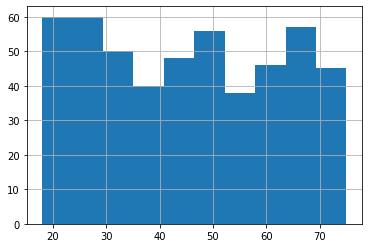

In [ ]:
users['age'].hist()

This is a reasonable range.

In [ ]:
print(len(users['city'].unique()))

73


In [ ]:
users['city'] = users['city'].str.lower()

In [ ]:
print(len(users['city'].unique()))

73


Everything seems fine. There were no duplicates.

In [ ]:
users['reg_date'].min()

Timestamp('2018-01-01 00:00:00')

In [ ]:
users['reg_date'].max()

Timestamp('2018-12-31 00:00:00')

Registration date is over the course of 1 year (only 2018).

In [ ]:
users['tariff'].unique()

array(['ultimate', 'surf'], dtype=object)

Looks good. No error.

In [ ]:
users['churn_date'].unique()

array(['plan still in use', Timestamp('2018-12-18 00:00:00'),
       Timestamp('2018-11-16 00:00:00'), Timestamp('2018-09-07 00:00:00'),
       Timestamp('2018-12-30 00:00:00'), Timestamp('2018-10-07 00:00:00'),
       Timestamp('2018-12-31 00:00:00'), Timestamp('2018-11-24 00:00:00'),
       Timestamp('2018-11-11 00:00:00'), Timestamp('2018-12-12 00:00:00'),
       Timestamp('2018-11-14 00:00:00'), Timestamp('2018-12-27 00:00:00'),
       Timestamp('2018-11-29 00:00:00'), Timestamp('2018-12-22 00:00:00'),
       Timestamp('2018-11-30 00:00:00'), Timestamp('2018-10-13 00:00:00'),
       Timestamp('2018-07-31 00:00:00'), Timestamp('2018-12-15 00:00:00'),
       Timestamp('2018-12-19 00:00:00'), Timestamp('2018-10-03 00:00:00'),
       Timestamp('2018-10-22 00:00:00'), Timestamp('2018-08-16 00:00:00'),
       Timestamp('2018-12-26 00:00:00'), Timestamp('2018-09-01 00:00:00'),
       Timestamp('2018-11-21 00:00:00'), Timestamp('2018-08-19 00:00:00'),
       Timestamp('2018-12-10 00:00:00'

In [ ]:
users[users['churn_date'] != 'plan still in use']['churn_date'].min()

Timestamp('2018-07-31 00:00:00')

In [ ]:
users[users['churn_date'] != 'plan still in use']['churn_date'].max()

Timestamp('2018-12-31 00:00:00')

The users started to cancel plan from Aug 31 and data lasts until Dec 31 of 2018. Looks like the data only includes dates in 2018.

##### calls

In [ ]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
id           137735 non-null int64
user_id      137735 non-null int64
call_date    137735 non-null datetime64[ns]
duration     137735 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 4.2 MB


In [ ]:
print(len(calls['id'].unique()))

137735


This is the number of calls done by this sample of users.

In [ ]:
print(len(calls['user_id'].unique()))

481


There were 500 users and 481 of them used calls.

In [ ]:
calls['call_date'].min()

Timestamp('2018-01-15 00:00:00')

In [ ]:
calls['call_date'].max()

Timestamp('2018-12-31 00:00:00')

The call data also is only in 2018.

In [ ]:
calls['duration'].min()

0.0

In [ ]:
calls['duration'].max()

38.0

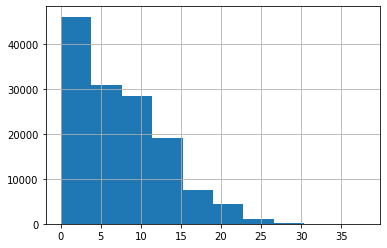

In [ ]:
calls['duration'].hist()

In [ ]:
zero_duration_calls = len(calls[calls['duration'] == 0]['duration'])

In [ ]:
total_calls = len(calls['duration'])

In [ ]:
share_zero_duration_calls = zero_duration_calls / total_calls

In [ ]:
print(share_zero_duration_calls)

0.1948233927469416


Zero minute duration calls are missed calls. I will leave them in the data since they make up 20% of data, which is a significant amount.

##### messages

In [ ]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
id              76051 non-null int64
user_id         76051 non-null int64
message_date    76051 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.7 MB


In [ ]:
print(len(messages['id'].unique()))

76051


There were this many messages sent by the 500 user sample.

In [ ]:
print(len(messages['user_id'].unique()))

402


There were 500 users and 402 of them used messages.

In [ ]:
messages['message_date'].min()

Timestamp('2018-01-15 00:00:00')

In [ ]:
messages['message_date'].max()

Timestamp('2018-12-31 00:00:00')

The message dates are also all in 2018. Both call and messages start on Jan 15, even though they registered on Jan 1. Maybe it takes 14 days for the service to turn on.

##### internet

In [ ]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
id              104825 non-null int64
user_id         104825 non-null int64
session_date    104825 non-null datetime64[ns]
mb_used         104825 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 3.2 MB


In [ ]:
print(len(internet['id'].unique()))

104825


This is the number of times internet was used by this sample of users.

In [ ]:
print(len(internet['user_id'].unique()))

489


489 of the 500 users used internet in 2018.

In [ ]:
internet['session_date'].min()

Timestamp('2018-01-15 00:00:00')

In [ ]:
internet['session_date'].max()

Timestamp('2018-12-31 00:00:00')

The dates are also all in 2018. Just as calls and messages, the first internet use was on Jan 15, even though the reg_date of the users was Jan 1.

In [ ]:
internet['mb_used'].min()

0.0

In [ ]:
internet['mb_used'].max()

1694.0

In [ ]:
print(len(internet[internet['mb_used'] == 0.0]['mb_used']))

13747


In [ ]:
zero_mb_internet = len(internet[internet['mb_used'] == 0.0]['mb_used'])

In [ ]:
total_internet = len(calls['duration'])

In [ ]:
share_zero_mb = zero_mb_internet / total_internet

In [ ]:
print(share_zero_mb)

0.09980760155370821


This data of zero megabytes in an internet using session is confusing and should be removed. This is less than 10% of data and there is no plausible explanation like in calls where 0 duration could mean missed call.

In [ ]:
# internet = internet[internet['mb_used'] != 0.0]#

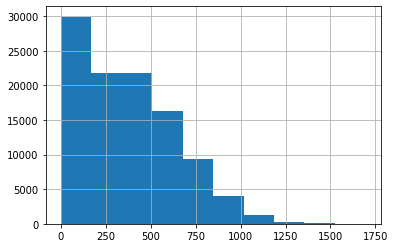

In [ ]:
internet['mb_used'].hist()

Now the 0 mb sessions are not included.

##### plans

In [ ]:
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
usd_monthly_pay          2 non-null int64
usd_per_gb               2 non-null int64
usd_per_message          2 non-null float64
usd_per_minute           2 non-null float64
plan_name                2 non-null object
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [ ]:
print(plans.head())

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


In the mb_per_month_included column, it says surf includes 15360 and ultimate includes 30720, while in the description it says surf includes 15 GB of data while ultimate includes 30 GB of data. However, this is probably okay, since it is just rounded for the advertisement.

#### Explain what errors you found and how you removed them. Note: many calls have a duration of 0.0 minutes. These might be missed calls. Whether or not to preprocess these values is up to you; assess how much their absence would affect the results of your analysis.

In the mb_used column of the internet DataFrame, there were 0.0 mb values for some sessions. I could remove these values since they consisted of less than 10% of data. 

In the duration column of the calls DataFrame, I did not remove the values with 0 duration since they could mean missed calls and they were about 20 percent of the data.


#### For each user, find the number of calls made and minutes used per month, find the number of text messages sent per month, and find the volume of data per month.


In [ ]:
calls['month'] = calls['call_date'].dt.month

In [ ]:
messages['month'] = messages['message_date'].dt.month

In [ ]:
internet['month'] = internet['session_date'].dt.month

In [ ]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 5 columns):
id           137735 non-null int64
user_id      137735 non-null int64
call_date    137735 non-null datetime64[ns]
duration     137735 non-null float64
month        137735 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 5.3 MB


In [ ]:
# extra code

calls_pivoted = calls.pivot_table(index=['user_id', 'month'], values='duration', aggfunc='sum').reset_index()
agg = users.merge(calls_pivoted, on='user_id', how="outer")
agg


,user_id,first_name,last_name,age,city,reg_date,tariff,churn_date,month,duration
0,1000,anamaria,bauer,45,"atlanta-sandy springs-roswell, ga msa",2018-12-24,ultimate,plan still in use,12.0,124.0
1,1001,mickey,wilkerson,28,"seattle-tacoma-bellevue, wa msa",2018-08-13,surf,plan still in use,8.0,182.0
2,1001,mickey,wilkerson,28,"seattle-tacoma-bellevue, wa msa",2018-08-13,surf,plan still in use,9.0,315.0
3,1001,mickey,wilkerson,28,"seattle-tacoma-bellevue, wa msa",2018-08-13,surf,plan still in use,10.0,393.0
4,1001,mickey,wilkerson,28,"seattle-tacoma-bellevue, wa msa",2018-08-13,surf,plan still in use,11.0,426.0
...,...,...,...,...,...,...,...,...,...,...
2272,1498,scot,williamson,51,"new york-newark-jersey city, ny-nj-pa msa",2018-02-04,surf,plan still in use,12.0,339.0
2273,1499,shena,dickson,37,"orlando-kissimmee-sanford, fl msa",2018-05-06,surf,plan still in use,9.0,346.0
2274,1499,shena,dickson,37,"orlando-kissimmee-sanford, fl msa",2018-05-06,surf,plan still in use,10.0,385.0
2275,1499,shena,dickson,37,"orlando-kissimmee-sanford, fl msa",2018-05-06,surf,plan still in use,11.0,308.0


In [ ]:
##extra code

#without reset_index()
print(calls.pivot_table(index=['user_id', 'month'], values='duration', aggfunc='sum').head(10))
print()

#with reset_index()
print(calls.pivot_table(index=['user_id', 'month'], values='duration', aggfunc='sum').reset_index().head(10))


               duration
user_id month          
1000    12        124.0
1001    8         182.0
        9         315.0
        10        393.0
        11        426.0
        12        412.0
1002    10         59.0
        11        386.0
        12        384.0
1003    12       1104.0

   user_id  month  duration
0     1000     12     124.0
1     1001      8     182.0
2     1001      9     315.0
3     1001     10     393.0
4     1001     11     426.0
5     1001     12     412.0
6     1002     10      59.0
7     1002     11     386.0
8     1002     12     384.0
9     1003     12    1104.0


In [ ]:
#extra code

calls_pivoted = calls.pivot_table(index=['user_id', 'month'], values='duration', aggfunc='sum').reset_index()

In [ ]:
min_pivoted = calls.pivot_table(index=['user_id', 'month'], values='duration', aggfunc='sum').reset_index()
agg = agg.merge(min_pivoted, on=['user_id', 'month'], how="outer")
agg

,user_id,first_name,last_name,age,city,reg_date,tariff,churn_date,month,duration_x,duration_y
0,1000,anamaria,bauer,45,"atlanta-sandy springs-roswell, ga msa",2018-12-24,ultimate,plan still in use,12.0,124.0,124.0
1,1001,mickey,wilkerson,28,"seattle-tacoma-bellevue, wa msa",2018-08-13,surf,plan still in use,8.0,182.0,182.0
2,1001,mickey,wilkerson,28,"seattle-tacoma-bellevue, wa msa",2018-08-13,surf,plan still in use,9.0,315.0,315.0
3,1001,mickey,wilkerson,28,"seattle-tacoma-bellevue, wa msa",2018-08-13,surf,plan still in use,10.0,393.0,393.0
4,1001,mickey,wilkerson,28,"seattle-tacoma-bellevue, wa msa",2018-08-13,surf,plan still in use,11.0,426.0,426.0
...,...,...,...,...,...,...,...,...,...,...,...
2272,1498,scot,williamson,51,"new york-newark-jersey city, ny-nj-pa msa",2018-02-04,surf,plan still in use,12.0,339.0,339.0
2273,1499,shena,dickson,37,"orlando-kissimmee-sanford, fl msa",2018-05-06,surf,plan still in use,9.0,346.0,346.0
2274,1499,shena,dickson,37,"orlando-kissimmee-sanford, fl msa",2018-05-06,surf,plan still in use,10.0,385.0,385.0
2275,1499,shena,dickson,37,"orlando-kissimmee-sanford, fl msa",2018-05-06,surf,plan still in use,11.0,308.0,308.0


In [ ]:
msgs_pivoted = messages.pivot_table(index=['user_id', 'month'], values='message_date', aggfunc='count').reset_index()
agg = agg.merge(msgs_pivoted, on=['user_id', 'month'], how="outer")
agg

,user_id,first_name,last_name,age,city,reg_date,tariff,churn_date,month,duration_x,duration_y,message_date
0,1000,anamaria,bauer,45.0,"atlanta-sandy springs-roswell, ga msa",2018-12-24,ultimate,plan still in use,12.0,124.0,124.0,11.0
1,1001,mickey,wilkerson,28.0,"seattle-tacoma-bellevue, wa msa",2018-08-13,surf,plan still in use,8.0,182.0,182.0,30.0
2,1001,mickey,wilkerson,28.0,"seattle-tacoma-bellevue, wa msa",2018-08-13,surf,plan still in use,9.0,315.0,315.0,44.0
3,1001,mickey,wilkerson,28.0,"seattle-tacoma-bellevue, wa msa",2018-08-13,surf,plan still in use,10.0,393.0,393.0,53.0
4,1001,mickey,wilkerson,28.0,"seattle-tacoma-bellevue, wa msa",2018-08-13,surf,plan still in use,11.0,426.0,426.0,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2305,1349,NaN,NaN,NaN,NaN,NaT,NaN,NaN,10.0,NaN,NaN,76.0
2306,1349,NaN,NaN,NaN,NaN,NaT,NaN,NaN,11.0,NaN,NaN,72.0
2307,1349,NaN,NaN,NaN,NaN,NaT,NaN,NaN,12.0,NaN,NaN,61.0
2308,1361,NaN,NaN,NaN,NaN,NaT,NaN,NaN,5.0,NaN,NaN,2.0


In [ ]:
int_pivoted = internet.pivot_table(index=['user_id', 'month'], values='mb_used', aggfunc='sum').reset_index()
agg = agg.merge(int_pivoted, on=['user_id', 'month'], how="outer")
agg

,user_id,first_name,last_name,age,city,reg_date,tariff,churn_date,month,duration_x,duration_y,message_date,mb_used
0,1000,anamaria,bauer,45.0,"atlanta-sandy springs-roswell, ga msa",2018-12-24,ultimate,plan still in use,12.0,124.0,124.0,11.0,1903.0
1,1001,mickey,wilkerson,28.0,"seattle-tacoma-bellevue, wa msa",2018-08-13,surf,plan still in use,8.0,182.0,182.0,30.0,6929.0
2,1001,mickey,wilkerson,28.0,"seattle-tacoma-bellevue, wa msa",2018-08-13,surf,plan still in use,9.0,315.0,315.0,44.0,13333.0
3,1001,mickey,wilkerson,28.0,"seattle-tacoma-bellevue, wa msa",2018-08-13,surf,plan still in use,10.0,393.0,393.0,53.0,22356.0
4,1001,mickey,wilkerson,28.0,"seattle-tacoma-bellevue, wa msa",2018-08-13,surf,plan still in use,11.0,426.0,426.0,36.0,18524.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2307,1349,NaN,NaN,NaN,NaN,NaT,NaN,NaN,12.0,NaN,NaN,61.0,13052.0
2308,1361,NaN,NaN,NaN,NaN,NaT,NaN,NaN,5.0,NaN,NaN,2.0,1523.0
2309,1482,NaN,NaN,NaN,NaN,NaT,NaN,NaN,10.0,NaN,NaN,2.0,NaN
2310,1108,NaN,NaN,NaN,NaN,NaT,NaN,NaN,12.0,NaN,NaN,NaN,235.0


In [ ]:
agg.columns = ['user_id','first_name', 'last_name', 'age','city','reg_date', 'tariff',  'churn_date', 'month', 'number_calls_per_month', 'minutes_used_per_month', 'number_messages_per_month', 'volume_data_per_month']

In [ ]:
agg

,user_id,first_name,last_name,age,city,reg_date,tariff,churn_date,month,number_calls_per_month,minutes_used_per_month,number_messages_per_month,volume_data_per_month
0,1000,anamaria,bauer,45.0,"atlanta-sandy springs-roswell, ga msa",2018-12-24,ultimate,plan still in use,12.0,124.0,124.0,11.0,1903.0
1,1001,mickey,wilkerson,28.0,"seattle-tacoma-bellevue, wa msa",2018-08-13,surf,plan still in use,8.0,182.0,182.0,30.0,6929.0
2,1001,mickey,wilkerson,28.0,"seattle-tacoma-bellevue, wa msa",2018-08-13,surf,plan still in use,9.0,315.0,315.0,44.0,13333.0
3,1001,mickey,wilkerson,28.0,"seattle-tacoma-bellevue, wa msa",2018-08-13,surf,plan still in use,10.0,393.0,393.0,53.0,22356.0
4,1001,mickey,wilkerson,28.0,"seattle-tacoma-bellevue, wa msa",2018-08-13,surf,plan still in use,11.0,426.0,426.0,36.0,18524.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2307,1349,NaN,NaN,NaN,NaN,NaT,NaN,NaN,12.0,NaN,NaN,61.0,13052.0
2308,1361,NaN,NaN,NaN,NaN,NaT,NaN,NaN,5.0,NaN,NaN,2.0,1523.0
2309,1482,NaN,NaN,NaN,NaN,NaT,NaN,NaN,10.0,NaN,NaN,2.0,NaN
2310,1108,NaN,NaN,NaN,NaN,NaT,NaN,NaN,12.0,NaN,NaN,NaN,235.0


In [ ]:
#%%time

## extra code

#def call_number(row):
    #try:
        #user_call_data = users_calls[users_calls['user_id'] == row['user_id']]
        #user_call_count = user_call_data.pivot_table(index='month', values='duration', aggfunc='count')
        #user_call_count.columns = ['number_calls']
        #number_call_monthly = user_call_count['number_calls'].mean()
    #except:
        #number_call_monthly = 0
    #return number_call_monthly

#users['number_calls_per_month'] = users.apply(call_number, axis=1)
#users.head()

In [ ]:
#%%time

## extra code

#user_call_count = users_calls.pivot_table(index=['user_id', 'month'], values='duration', aggfunc='count')
#user_call_count = user_call_count.groupby('user_id').mean()
#user_call_count.columns = ['number_calls_per_month']


#print(user_call_count.head())


#users = users.set_index('user_id')
#df = df.merge(user_call_count, on=['user_id', 'month'], how='left')
#print(df.head())



#### For each user, find the monthly profit from each user (subtract the free package limit from the total number of calls, text messages, and data; multiply the result by the calling plan value; add the monthly charge depending on the calling plan)

In [ ]:
agg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2312 entries, 0 to 2311
Data columns (total 13 columns):
user_id                      2312 non-null int64
first_name                   2277 non-null object
last_name                    2277 non-null object
age                          2277 non-null float64
city                         2277 non-null object
reg_date                     2277 non-null datetime64[ns]
tariff                       2277 non-null object
churn_date                   2277 non-null object
month                        2293 non-null float64
number_calls_per_month       2258 non-null float64
minutes_used_per_month       2258 non-null float64
number_messages_per_month    1806 non-null float64
volume_data_per_month        2277 non-null float64
dtypes: datetime64[ns](1), float64(6), int64(1), object(5)
memory usage: 252.9+ KB


In [ ]:
agg['plan_name']= agg['tariff']

In [ ]:
agg_plan = agg.merge(plans, on='plan_name', how='left')

In [ ]:
agg_plan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2312 entries, 0 to 2311
Data columns (total 21 columns):
user_id                      2312 non-null int64
first_name                   2277 non-null object
last_name                    2277 non-null object
age                          2277 non-null float64
city                         2277 non-null object
reg_date                     2277 non-null datetime64[ns]
tariff                       2277 non-null object
churn_date                   2277 non-null object
month                        2293 non-null float64
number_calls_per_month       2258 non-null float64
minutes_used_per_month       2258 non-null float64
number_messages_per_month    1806 non-null float64
volume_data_per_month        2277 non-null float64
plan_name                    2277 non-null object
messages_included            2277 non-null float64
mb_per_month_included        2277 non-null float64
minutes_included             2277 non-null float64
usd_monthly_pay            

In [ ]:
def profit(row):
    if (row['minutes_used_per_month'] > row['minutes_included']):
        row['monthly_callprofit_for_user'] = (row['minutes_used_per_month'] - row['minutes_included']) * row['usd_per_minute']
    else: 
        row['monthly_callprofit_for_user'] = 0
    
    if (row['number_messages_per_month'] > row['messages_included']):
        row['monthly_msgprofit_for_user'] = (row['number_messages_per_month'] - row['messages_included']) * row['usd_per_message']
    else: 
        row['monthly_msgprofit_for_user'] = 0
    
    if (row['volume_data_per_month'] > row['mb_per_month_included']):
        row['monthly_intprofit_for_user'] = (row['volume_data_per_month'] - row['mb_per_month_included']) / 1000 * row['usd_per_gb']
    else: 
        row['monthly_intprofit_for_user'] = 0

    monthly_profit = row['usd_monthly_pay'] + row['monthly_callprofit_for_user'] + row['monthly_msgprofit_for_user'] + row['monthly_intprofit_for_user'] 
    
    return monthly_profit


agg_plan['monthly_profit'] = agg_plan.apply(profit, axis=1)


In [ ]:
agg_plan.head()

,user_id,first_name,last_name,age,city,reg_date,tariff,churn_date,month,number_calls_per_month,...,volume_data_per_month,plan_name,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,monthly_profit
0,1000,anamaria,bauer,45.0,"atlanta-sandy springs-roswell, ga msa",2018-12-24,ultimate,plan still in use,12.0,124.0,...,1903.0,ultimate,1000.0,30720.0,3000.0,70.0,7.0,0.01,0.01,70.00
1,1001,mickey,wilkerson,28.0,"seattle-tacoma-bellevue, wa msa",2018-08-13,surf,plan still in use,8.0,182.0,...,6929.0,surf,50.0,15360.0,500.0,20.0,10.0,0.03,0.03,20.00
2,1001,mickey,wilkerson,28.0,"seattle-tacoma-bellevue, wa msa",2018-08-13,surf,plan still in use,9.0,315.0,...,13333.0,surf,50.0,15360.0,500.0,20.0,10.0,0.03,0.03,20.00
3,1001,mickey,wilkerson,28.0,"seattle-tacoma-bellevue, wa msa",2018-08-13,surf,plan still in use,10.0,393.0,...,22356.0,surf,50.0,15360.0,500.0,20.0,10.0,0.03,0.03,90.05
4,1001,mickey,wilkerson,28.0,"seattle-tacoma-bellevue, wa msa",2018-08-13,surf,plan still in use,11.0,426.0,...,18524.0,surf,50.0,15360.0,500.0,20.0,10.0,0.03,0.03,51.64


In [ ]:
monthly_profit_for_user = agg_plan.pivot_table(index='user_id', values='monthly_profit', aggfunc='sum')

In [ ]:
monthly_profit_for_user

,monthly_profit
user_id,
1000,70.00
1001,242.07
1002,100.04
1003,155.21
1004,592.70
...,...
1495,459.00
1496,121.52
1497,70.00


In [ ]:
users = users.merge(monthly_profit_for_user, on='user_id', how='left')

In [ ]:
users

,user_id,first_name,last_name,age,city,reg_date,tariff,churn_date,monthly_profit
0,1000,anamaria,bauer,45,"atlanta-sandy springs-roswell, ga msa",2018-12-24,ultimate,plan still in use,70.00
1,1001,mickey,wilkerson,28,"seattle-tacoma-bellevue, wa msa",2018-08-13,surf,plan still in use,242.07
2,1002,carlee,hoffman,36,"las vegas-henderson-paradise, nv msa",2018-10-21,surf,plan still in use,100.04
3,1003,reynaldo,jenkins,52,"tulsa, ok msa",2018-01-28,surf,plan still in use,155.21
4,1004,leonila,thompson,40,"seattle-tacoma-bellevue, wa msa",2018-05-23,surf,plan still in use,592.70
...,...,...,...,...,...,...,...,...,...
495,1495,fidel,sharpe,67,"new york-newark-jersey city, ny-nj-pa msa",2018-09-04,surf,plan still in use,459.00
496,1496,ariel,shepherd,49,"new orleans-metairie, la msa",2018-02-20,surf,plan still in use,121.52
497,1497,donte,barrera,49,"los angeles-long beach-anaheim, ca msa",2018-12-10,ultimate,plan still in use,70.00
498,1498,scot,williamson,51,"new york-newark-jersey city, ny-nj-pa msa",2018-02-04,surf,plan still in use,813.73


## Step 3. Analyze the data

#### Describe the customers' behavior. 

In [ ]:
monthly_profit_per_plan = users.pivot_table(index='tariff', values='monthly_profit', aggfunc='sum')

In [ ]:
monthly_profit_per_plan

,monthly_profit
tariff,
surf,89972.820
ultimate,51857.547


It seems that the surf plan is more profitable since the users go over the limits included in the plan and pay for additional minutes, messages, and internet.

In [ ]:
surf_data = agg_plan[agg_plan['tariff'] == 'surf']

In [ ]:
ultimate_data = agg_plan[agg_plan['tariff'] == 'ultimate']

 ##### Find the minutes the users of each plan require per month. 

Calculate the mean.

-surf

In [ ]:
surf_min_mean = surf_data['minutes_used_per_month'].mean()

In [ ]:
surf_min_mean

436.51974110032364

-ultimate

In [ ]:
ultimate_min_mean = ultimate_data['minutes_used_per_month'].mean()

In [ ]:
ultimate_min_mean

434.67601683029454

In [ ]:
plans['avg_call_minutes_per_month_for_plan']= [surf_min_mean, ultimate_min_mean]

In [ ]:
plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,avg_call_minutes_per_month_for_plan
0,50,15360,500,20,10,0.03,0.03,surf,436.519741
1,1000,30720,3000,70,7,0.01,0.01,ultimate,434.676017


Calculate the dispersion.

In [ ]:
import numpy as np

-surf

In [ ]:
surf_min_var = np.var(surf_data['minutes_used_per_month'])

In [ ]:
surf_min_var

52537.03666530514

-ultimate

In [ ]:
ultimate_min_var = np.var(ultimate_data['minutes_used_per_month'])

In [ ]:
ultimate_min_var

56494.28633925357

Calculate the standard deviation. 

-surf

In [ ]:
surf_min_std = np.sqrt(surf_min_var)

In [ ]:
surf_min_std

229.20959112852398

-ultimate

In [ ]:
ultimate_min_std = np.sqrt(ultimate_min_var)

In [ ]:
ultimate_min_std

237.68526740051342

 Plot histogram. Describe the distributions.

-surf

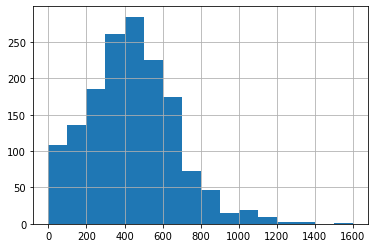

In [ ]:
surf_data['minutes_used_per_month'].hist(bins=[0,100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600])

-ultimate

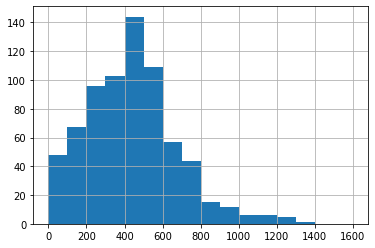

In [ ]:
ultimate_data['minutes_used_per_month'].hist(bins=[0,100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600])

In [ ]:
surf_data['minutes_used_per_month'].mean()

436.51974110032364

In [ ]:
surf_data['minutes_used_per_month'].median()

430.0

In [ ]:
ultimate_data['minutes_used_per_month'].mean()

434.67601683029454

In [ ]:
ultimate_data['minutes_used_per_month'].median()

425.0

The data has a normal distribution. Surf and ultimate is skewed to the right (mean > median).

Surf plan users go over their monthly 500 minute limit but the ultimate plan users stay under their monthly 3000 minute limit. 

 ##### Find the texts the users of each plan require per month. 

Calculate the mean. 

-surf

In [ ]:
surf_msg_mean = surf_data['number_messages_per_month'].mean()

In [ ]:
surf_msg_mean

39.98073701842546

-ultimate

In [ ]:
ultimate_msg_mean = ultimate_data['number_messages_per_month'].mean()

In [ ]:
ultimate_msg_mean

46.4559585492228

In [ ]:
plans['avg_texts_per_month_for_plan']= [surf_msg_mean, ultimate_msg_mean]

Calculate the dispersion.

-surf

In [ ]:
surf_msg_var = np.var(surf_data['number_messages_per_month'])

In [ ]:
surf_msg_var

1100.6152068269882

-ultimate

In [ ]:
ultimate_msg_var = np.var(ultimate_data['number_messages_per_month'])

In [ ]:
ultimate_msg_var

1082.5209446338606

Calculate the standard deviation. 

-surf

In [ ]:
surf_msg_std = np.sqrt(surf_msg_var)

In [ ]:
surf_msg_std

33.17552119902547

-ultimate

In [ ]:
ultimate_msg_std = np.sqrt(ultimate_msg_var)

In [ ]:
ultimate_msg_std

32.901686045457616

 Plot histogram. Describe the distributions.

-surf

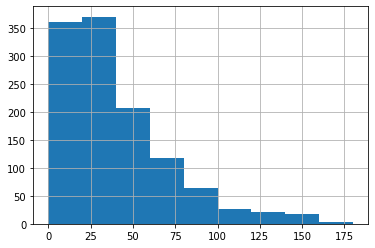

In [ ]:
surf_data['number_messages_per_month'].hist(bins=[0,20,40,60,80,100,120,140,160,180])

-ultimate

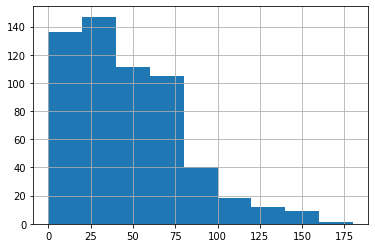

In [ ]:
ultimate_data['number_messages_per_month'].hist(bins=[0,20,40,60,80,100,120,140,160,180])

In [ ]:
surf_data['number_messages_per_month'].mean()

39.98073701842546

In [ ]:
surf_data['number_messages_per_month'].median()

32.0

In [ ]:
ultimate_data['number_messages_per_month'].mean()

46.4559585492228

In [ ]:
ultimate_data['number_messages_per_month'].median()

41.0

The data has a normal distribution. Surf and ultimate is skewed to the right (mean > median).

Many surf plan users go over their monthly 50 text limit, while ultimate plan users stay under their monthly 1000 text limit. 

##### Find the volume of data the users of each plan require per month.

Calculate the mean. 

-surf

In [ ]:
surf_int_mean = (surf_data['volume_data_per_month']/1000).mean()

In [ ]:
surf_int_mean

16.687230065359476

-ultimate

In [ ]:
ultimate_int_mean = (ultimate_data['volume_data_per_month']/1000).mean()

In [ ]:
ultimate_int_mean

17.298039270687237

In [ ]:
plans['avg_data_volume_per_month_for_plan_gb']= [surf_int_mean, ultimate_int_mean]

Calculate the dispersion.

-surf

In [ ]:
surf_int_var = np.var(surf_data['volume_data_per_month']/1000)

In [ ]:
surf_int_var

59.572546625501296

-ultimate

In [ ]:
ultimate_int_var = np.var(ultimate_data['volume_data_per_month']/1000)

In [ ]:
ultimate_int_var

60.237521931136634

Calculate the standard deviation. 

-surf

In [ ]:
surf_int_std = np.sqrt(surf_int_var)

In [ ]:
surf_int_std

7.718325377016785

-ultimate

In [ ]:
ultimate_int_std = np.sqrt(ultimate_int_var)

In [ ]:
ultimate_int_std

7.7612835234345505

 Plot histogram. Describe the distributions.

-surf

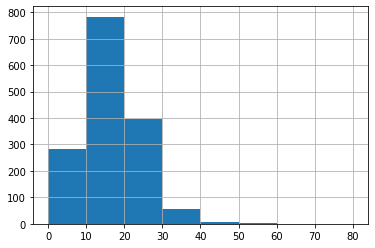

In [ ]:
(surf_data['volume_data_per_month']/1000).hist(bins=[0,10,20,30,40,50,60,70,80])

-ultimate

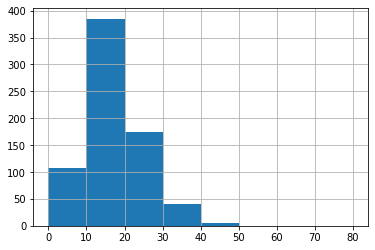

In [ ]:
(ultimate_data['volume_data_per_month']/1000).hist(bins=[0,10,20,30,40,50,60,70,80])

In [ ]:
(surf_data['volume_data_per_month']/1000).mean()

16.687230065359476

In [ ]:
(surf_data['volume_data_per_month']/1000).median()

16.9495

In [ ]:
(ultimate_data['volume_data_per_month']/1000).mean()

17.298039270687237

In [ ]:
(ultimate_data['volume_data_per_month']/1000).median()

16.889

The data has a normal distribution. Surf is skewed to the left (mean < median) and ultimate is skewed to the right (mean > median).

Many surf plan users go over their monthly 15GB limit, while most ultimate plan users stay under their monthly 30 GB limit.

In [ ]:
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,avg_call_minutes_per_month_for_plan,avg_texts_per_month_for_plan,avg_data_volume_per_month_for_plan_gb
0,50,15360,500,20,10,0.03,0.03,surf,436.519741,39.980737,16.687230
1,1000,30720,3000,70,7,0.01,0.01,ultimate,434.676017,46.455959,17.298039


## Step 4. Test the hypotheses

In [ ]:
from scipy import stats as st

### The average profit from users of Ultimate and Surf calling plans differs.

In [ ]:
avg_user_profit_surf = surf_data['monthly_profit']

In [ ]:
avg_user_profit_ultimate = ultimate_data['monthly_profit']

In [ ]:
alpha = 0.05 

#### (You decide what alpha value to use.)

I set alpha = 0.05 because this is the conventional threshold value for the p-value. This is the significance level that I chose to test the hypotheses. I would not want to be wrong more than 5% of the time.

In [ ]:
results = st.ttest_ind(
        avg_user_profit_surf, 
        avg_user_profit_ultimate)

In [ ]:
print('p-value: ', results.pvalue)

p-value:  9.488405739637983e-13


In [ ]:
if (results.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We can't reject the null hypothesis")

We reject the null hypothesis


####  Explain how you formulated the null and alternative hypotheses.

Null hypothesis: The average profit from users of Ultimate and Surf calling plans is the same.


Alternative hypothesis: The average profit from users of Ultimate and Surf calling plans differs. 

#### Explain what criterion you used to test the hypotheses and why.

Since the null hypothesis was rejected, we do not reject the alternative hypothesis and we can say that the average profit from users of Ultimate and Surf calling plans differs.

### The average profit from users in NY-NJ area is different from that of the users from other regions.

In [ ]:
users.head()

,user_id,first_name,last_name,age,city,reg_date,tariff,churn_date,monthly_profit
0,1000,anamaria,bauer,45,"atlanta-sandy springs-roswell, ga msa",2018-12-24,ultimate,plan still in use,70.00
1,1001,mickey,wilkerson,28,"seattle-tacoma-bellevue, wa msa",2018-08-13,surf,plan still in use,242.07
2,1002,carlee,hoffman,36,"las vegas-henderson-paradise, nv msa",2018-10-21,surf,plan still in use,100.04
3,1003,reynaldo,jenkins,52,"tulsa, ok msa",2018-01-28,surf,plan still in use,155.21
4,1004,leonila,thompson,40,"seattle-tacoma-bellevue, wa msa",2018-05-23,surf,plan still in use,592.70


In [ ]:
users['city'].unique()

array(['atlanta-sandy springs-roswell, ga msa',
       'seattle-tacoma-bellevue, wa msa',
       'las vegas-henderson-paradise, nv msa', 'tulsa, ok msa',
       'dallas-fort worth-arlington, tx msa',
       'san francisco-oakland-berkeley, ca msa',
       'grand rapids-kentwood, mi msa',
       'orlando-kissimmee-sanford, fl msa',
       'san jose-sunnyvale-santa clara, ca msa',
       'cleveland-elyria, oh msa',
       'chicago-naperville-elgin, il-in-wi msa', 'knoxville, tn msa',
       'new york-newark-jersey city, ny-nj-pa msa', 'pittsburgh, pa msa',
       'fresno, ca msa',
       'washington-arlington-alexandria, dc-va-md-wv msa',
       'indianapolis-carmel-anderson, in msa', 'jacksonville, fl msa',
       'los angeles-long beach-anaheim, ca msa',
       'omaha-council bluffs, ne-ia msa',
       'houston-the woodlands-sugar land, tx msa',
       'philadelphia-camden-wilmington, pa-nj-de-md msa',
       'tampa-st. petersburg-clearwater, fl msa',
       'birmingham-hoover, al msa'

In [ ]:
subset_data = users[users['city'].str.contains('ny') | users['city'].str.contains('nj')]

In [ ]:
subset_data['city'].unique()

array(['san jose-sunnyvale-santa clara, ca msa',
       'new york-newark-jersey city, ny-nj-pa msa',
       'philadelphia-camden-wilmington, pa-nj-de-md msa',
       'buffalo-cheektowaga, ny msa', 'albany-schenectady-troy, ny msa',
       'rochester, ny msa'], dtype=object)

In [ ]:
nynj_data = subset_data[subset_data['city'] != 'san jose-sunnyvale-santa clara, ca msa']

In [ ]:
nynj_data['city'].unique()

array(['new york-newark-jersey city, ny-nj-pa msa',
       'philadelphia-camden-wilmington, pa-nj-de-md msa',
       'buffalo-cheektowaga, ny msa', 'albany-schenectady-troy, ny msa',
       'rochester, ny msa'], dtype=object)

In [ ]:
not_nynj = users[(~users['city'].str.contains('ny') & ~users['city'].str.contains('nj'))]

In [ ]:
ca_data = users[users['city'] == 'san jose-sunnyvale-santa clara, ca msa']

In [ ]:
not_nynj_data = not_nynj.append(ca_data)

In [ ]:
not_nynj_data['city'].unique()

array(['atlanta-sandy springs-roswell, ga msa',
       'seattle-tacoma-bellevue, wa msa',
       'las vegas-henderson-paradise, nv msa', 'tulsa, ok msa',
       'dallas-fort worth-arlington, tx msa',
       'san francisco-oakland-berkeley, ca msa',
       'grand rapids-kentwood, mi msa',
       'orlando-kissimmee-sanford, fl msa', 'cleveland-elyria, oh msa',
       'chicago-naperville-elgin, il-in-wi msa', 'knoxville, tn msa',
       'pittsburgh, pa msa', 'fresno, ca msa',
       'washington-arlington-alexandria, dc-va-md-wv msa',
       'indianapolis-carmel-anderson, in msa', 'jacksonville, fl msa',
       'los angeles-long beach-anaheim, ca msa',
       'omaha-council bluffs, ne-ia msa',
       'houston-the woodlands-sugar land, tx msa',
       'tampa-st. petersburg-clearwater, fl msa',
       'birmingham-hoover, al msa', 'oklahoma city, ok msa',
       'charlotte-concord-gastonia, nc-sc msa',
       'denver-aurora-lakewood, co msa',
       'nashville-davidson–murfreesboro–franklin, 

In [ ]:
not_nynj_data

,user_id,first_name,last_name,age,city,reg_date,tariff,churn_date,monthly_profit
0,1000,anamaria,bauer,45,"atlanta-sandy springs-roswell, ga msa",2018-12-24,ultimate,plan still in use,70.00
1,1001,mickey,wilkerson,28,"seattle-tacoma-bellevue, wa msa",2018-08-13,surf,plan still in use,242.07
2,1002,carlee,hoffman,36,"las vegas-henderson-paradise, nv msa",2018-10-21,surf,plan still in use,100.04
3,1003,reynaldo,jenkins,52,"tulsa, ok msa",2018-01-28,surf,plan still in use,155.21
4,1004,leonila,thompson,40,"seattle-tacoma-bellevue, wa msa",2018-05-23,surf,plan still in use,592.70
...,...,...,...,...,...,...,...,...,...
9,1009,gerry,little,19,"san jose-sunnyvale-santa clara, ca msa",2018-04-22,surf,plan still in use,863.95
145,1145,venice,brooks,29,"san jose-sunnyvale-santa clara, ca msa",2018-04-12,surf,plan still in use,359.25
194,1194,robert,mclean,40,"san jose-sunnyvale-santa clara, ca msa",2018-05-31,surf,plan still in use,20.00
231,1231,gaylord,witt,57,"san jose-sunnyvale-santa clara, ca msa",2018-01-19,ultimate,plan still in use,490.00


In [ ]:
avg_user_profit_nynj = nynj_data['monthly_profit']

In [ ]:
avg_user_profit_other = not_nynj_data['monthly_profit']

In [ ]:
alpha = 0.05 

#### (You decide what alpha value to use.)

I set alpha = 0.05 because this is the conventional threshold value for the p-value. This is the significance level that I chose to test the hypotheses. I would not want to be wrong more than 5% of the time.

In [ ]:
results = st.ttest_ind(
        avg_user_profit_nynj, 
        avg_user_profit_other)

In [ ]:
print('p-value: ', results.pvalue)

p-value:  0.7530154237529141


In [ ]:
if (results.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We can't reject the null hypothesis")

We can't reject the null hypothesis


####  Explain how you formulated the null and alternative hypotheses.

Null hypothesis: The average profit from users in NY-NJ area is the same as that of the users from other regions.


Alternative hypothesis: The average profit from users in NY-NJ area is different from that of the users from other regions.

#### Explain what criterion you used to test the hypotheses and why.

Since the null hypothesis was not rejected, we can say that the average profit from users in NY-NJ area is not different from that of the users from other regions.

## Step 5. Write an overall conclusion

The surf plan is more profitable. I suggest to advertise this plan more in order to maximize profit. It seems that the surf plan is more profitable since the users go over the limits included in the plan and pay for additional minutes, messages, and internet. Thus, even though the monthly fee for the ultimate plan is more expensive, the surf users pay more through additional fees in addition to their cheaper monthly fee.